In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/mnist_test.csv')

In [4]:
print(train.shape,test.shape)

(42000, 785) (28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


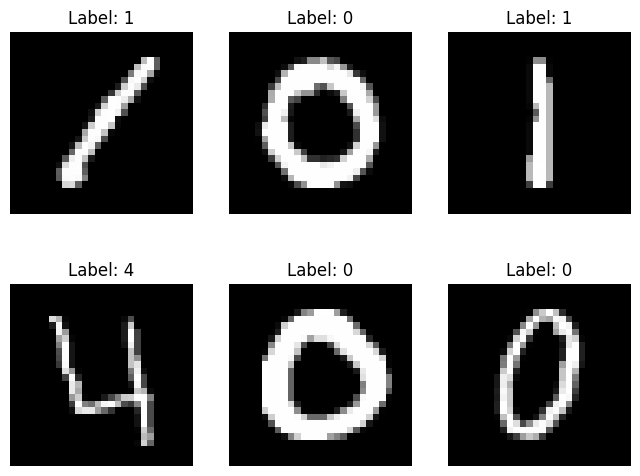

In [7]:
plt.figure(figsize=(8,6))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train.iloc[i,1:].values.reshape(28,28),cmap='grey')
  plt.title(f'Label: {train.iloc[i,0]}')
  plt.axis('off')
plt.show()

In [8]:
# Summary statistics
print("\nPixel intensity range (training):", train.iloc[i,1:].values.reshape(28,28).min(), "-", train.iloc[i,1:].values.reshape(28,28).max())


Pixel intensity range (training): 0 - 255


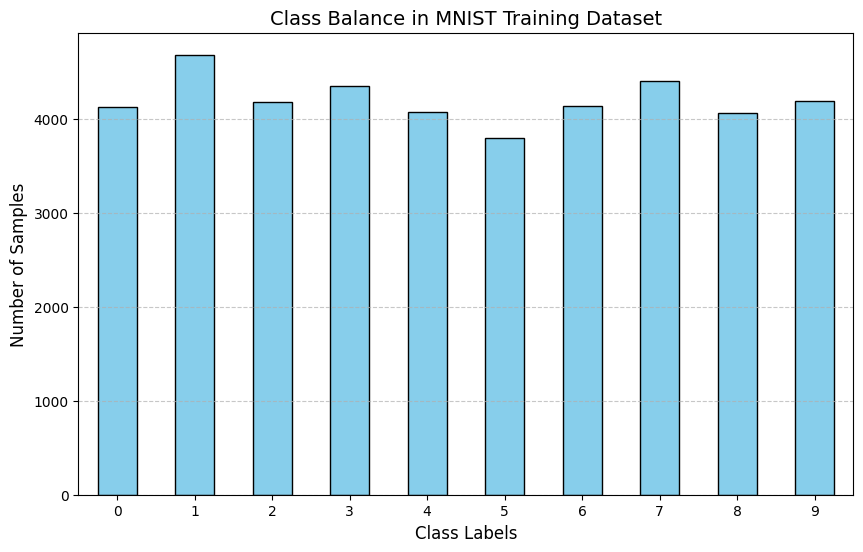

In [9]:
class_counts = train['label'].value_counts().sort_index()

# Plot class balance

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Balance in MNIST Training Dataset", fontsize=14)
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
pixel_columns = []
for col in train.columns:
  if col.startswith('pixel'):
    pixel_columns.append(col)
data = train[pixel_columns]
# data = train.drop(columns='label',axis=1)

In [11]:
print(data)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [12]:
all_pixels = data.values.flatten()

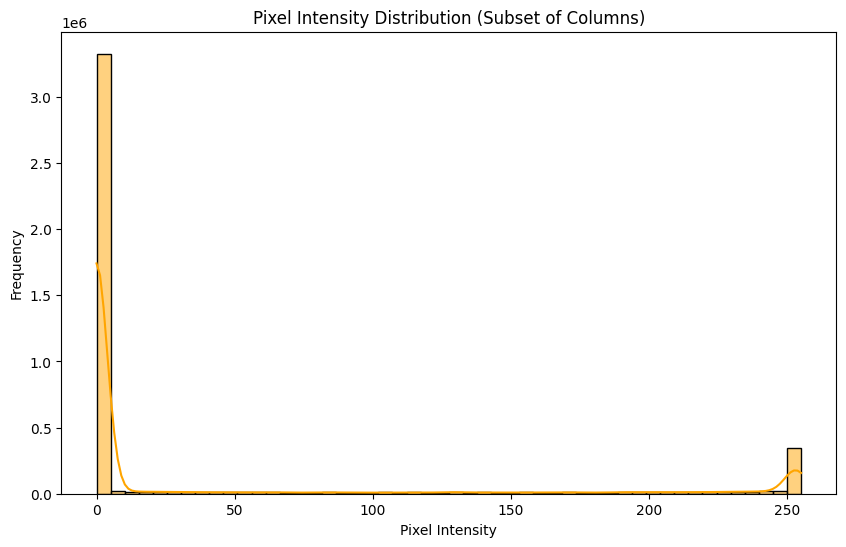

In [13]:
# Select a random subset of 100 pixel columns
subset_columns = np.random.choice(pixel_columns, size=100, replace=False)
subset_data = data[subset_columns].values.flatten()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(subset_data, bins=50, kde=True, color='orange', edgecolor='black')
plt.title('Pixel Intensity Distribution (Subset of Columns)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


the above histogram shows the distribution of low-intensity values near 0 and peak near 255

In [14]:
# Check for missing values in training and test datasets
print(train.isnull().sum().sum())  # For training data
print(test.isnull().sum().sum())  # For test data


0
0


Normalizing the pixel values 0 and 1

In [15]:
# Normalize the training and test datasets
train[pixel_columns] = data[pixel_columns] / 255.0
test[pixel_columns] = data[pixel_columns] / 255.0

In [16]:
pixel_columns = []
for col in train.columns:
  if col.startswith('pixel'):
    pixel_columns.append(col)

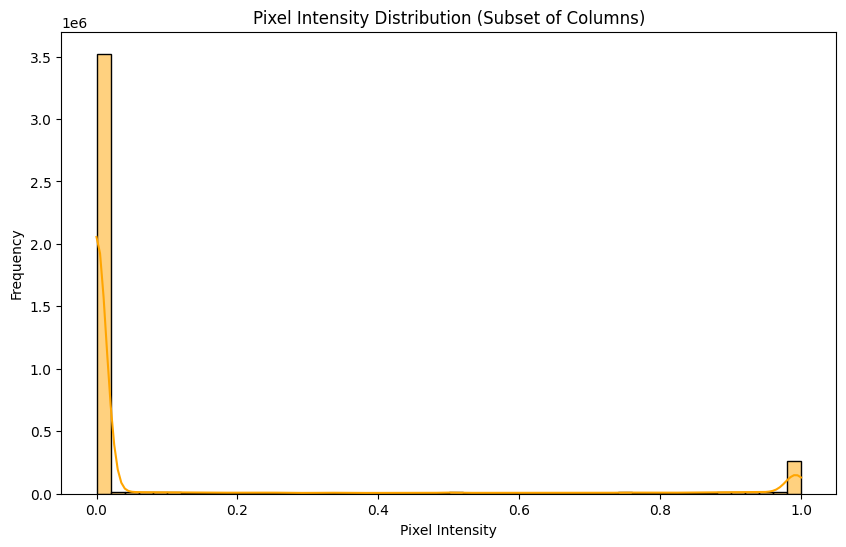

In [17]:
# Select a random subset of 100 pixel columns
subset_columns = np.random.choice(pixel_columns, size=100, replace=False)
subset_data = train[subset_columns].values.flatten()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(subset_data, bins=50, kde=True, color='orange', edgecolor='black')
plt.title('Pixel Intensity Distribution (Subset of Columns)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [18]:
X_train = train.drop(columns='label',axis=1)
y_train = train['label']
X_test = test
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
print(X_train_split.shape,X_val.shape,y_train_split.shape,X_test.shape)

(33600, 784) (8400, 784) (33600,) (28000, 784)


In [20]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))

KNN Validation Accuracy: 0.9667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.95      1.00      0.97       909
           2       0.98      0.95      0.96       846
           3       0.97      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.95      0.97      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.97      0.96       893
           8       0.98      0.93      0.95       835
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [21]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm)) # 4m 40s

SVM Validation Accuracy: 0.9320
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       816
           1       0.96      0.98      0.97       909
           2       0.91      0.93      0.92       846
           3       0.91      0.91      0.91       937
           4       0.93      0.95      0.94       839
           5       0.90      0.90      0.90       702
           6       0.96      0.95      0.95       785
           7       0.95      0.93      0.94       893
           8       0.92      0.89      0.90       835
           9       0.94      0.91      0.92       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [22]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

SVM Validation Accuracy: 0.9735
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.98      0.97      0.97       846
           3       0.97      0.96      0.96       937
           4       0.96      0.97      0.97       839
           5       0.97      0.97      0.97       702
           6       0.98      0.99      0.98       785
           7       0.98      0.97      0.97       893
           8       0.97      0.97      0.97       835
           9       0.96      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_split, y_train_split)

y_val_pred_dt = dt.predict(X_val)

dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')

print(classification_report(y_val, y_val_pred_dt))

Decision Tree Validation Accuracy: 0.8536
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       816
           1       0.92      0.94      0.93       909
           2       0.84      0.81      0.82       846
           3       0.80      0.82      0.81       937
           4       0.85      0.84      0.84       839
           5       0.80      0.79      0.79       702
           6       0.88      0.89      0.88       785
           7       0.90      0.88      0.89       893
           8       0.79      0.79      0.79       835
           9       0.86      0.85      0.85       838

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_split, y_train_split)

y_val_pred_lr = lr.predict(X_val)

lr_acc = accuracy_score(y_val, y_val_pred_lr)
print(f'Logistic Regression Validation Accuracy: {lr_acc:.4f}')

print(classification_report(y_val, y_val_pred_lr))


Logistic Regression Validation Accuracy: 0.9217
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.96      0.98      0.97       909
           2       0.92      0.90      0.91       846
           3       0.91      0.88      0.90       937
           4       0.92      0.94      0.93       839
           5       0.86      0.88      0.87       702
           6       0.93      0.96      0.95       785
           7       0.93      0.92      0.93       893
           8       0.90      0.88      0.89       835
           9       0.90      0.90      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_split, y_train_split)

y_val_pred_rf = rf.predict(X_val)

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Classifier Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))

Random Forest Classifier Validation Accuracy: 0.9632
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.95       937
           4       0.96      0.97      0.96       839
           5       0.97      0.95      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.96      0.95      0.96       835
           9       0.93      0.95      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



Now We will try to reduce the dimensions Using PCA , and check whether acccuracy improves or not

The PCA tries to keep more important features and removes less significant features

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # Reduce to 50 principal components
X_train_pca = pca.fit_transform(X_train_split)
X_val_pca = pca.transform(X_val)

In [27]:
print(X_train_pca.shape)

(33600, 50)


In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_pca, y_train_split)

y_val_pred_knn = knn_model.predict(X_val_pca)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))

KNN Validation Accuracy: 0.9743
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       816
           1       0.97      1.00      0.98       909
           2       0.98      0.97      0.97       846
           3       0.98      0.96      0.97       937
           4       0.99      0.97      0.98       839
           5       0.96      0.97      0.96       702
           6       0.98      0.99      0.98       785
           7       0.97      0.97      0.97       893
           8       0.98      0.96      0.97       835
           9       0.95      0.97      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [29]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train_split)

y_val_pred_svm = svm_model.predict(X_val_pca)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

SVM Validation Accuracy: 0.9295
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       816
           1       0.97      0.98      0.98       909
           2       0.91      0.92      0.92       846
           3       0.91      0.89      0.90       937
           4       0.93      0.94      0.93       839
           5       0.87      0.90      0.88       702
           6       0.95      0.95      0.95       785
           7       0.93      0.93      0.93       893
           8       0.93      0.90      0.91       835
           9       0.92      0.89      0.90       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [30]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_pca, y_train_split)

y_val_pred_svm = svm_model.predict(X_val_pca)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

SVM Validation Accuracy: 0.9777
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.98      0.98       846
           3       0.98      0.97      0.97       937
           4       0.97      0.97      0.97       839
           5       0.98      0.97      0.97       702
           6       0.98      0.99      0.99       785
           7       0.98      0.97      0.98       893
           8       0.97      0.98      0.98       835
           9       0.96      0.97      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train_split)

y_val_pred_dt = dt.predict(X_val_pca)

dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')

print(classification_report(y_val, y_val_pred_dt))

Decision Tree Validation Accuracy: 0.8308
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       816
           1       0.94      0.96      0.95       909
           2       0.82      0.83      0.82       846
           3       0.81      0.79      0.80       937
           4       0.80      0.80      0.80       839
           5       0.74      0.75      0.74       702
           6       0.87      0.87      0.87       785
           7       0.86      0.86      0.86       893
           8       0.77      0.78      0.77       835
           9       0.76      0.78      0.77       838

    accuracy                           0.83      8400
   macro avg       0.83      0.83      0.83      8400
weighted avg       0.83      0.83      0.83      8400



In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train_split)

y_val_pred_lr = lr.predict(X_val_pca)

lr_acc = accuracy_score(y_val, y_val_pred_lr)
print(f'Logistic Regression Validation Accuracy: {lr_acc:.4f}')

print(classification_report(y_val, y_val_pred_lr))

Logistic Regression Validation Accuracy: 0.9026
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.89      0.87      0.88       846
           3       0.89      0.84      0.86       937
           4       0.89      0.92      0.91       839
           5       0.82      0.85      0.84       702
           6       0.92      0.94      0.93       785
           7       0.91      0.91      0.91       893
           8       0.89      0.86      0.87       835
           9       0.87      0.89      0.88       838

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train_split)

y_val_pred_rf = rf.predict(X_val_pca)

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Classifier Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))

Random Forest Classifier Validation Accuracy: 0.9451
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.98      0.98       909
           2       0.95      0.93      0.94       846
           3       0.93      0.91      0.92       937
           4       0.96      0.94      0.95       839
           5       0.92      0.94      0.93       702
           6       0.94      0.98      0.96       785
           7       0.95      0.94      0.95       893
           8       0.92      0.92      0.92       835
           9       0.92      0.93      0.92       838

    accuracy                           0.95      8400
   macro avg       0.94      0.95      0.94      8400
weighted avg       0.95      0.95      0.95      8400



In [34]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_pca, y_train_split)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
xgb_predictions = model.predict(X_val_pca)
print("XGB Test(PCA) Accuracy:", accuracy_score(y_val, xgb_predictions))
print(classification_report(y_val, xgb_predictions))

XGB Test(PCA) Accuracy: 0.9607142857142857
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.95      0.95       846
           3       0.96      0.95      0.95       937
           4       0.96      0.96      0.96       839
           5       0.94      0.96      0.95       702
           6       0.97      0.97      0.97       785
           7       0.97      0.96      0.97       893
           8       0.95      0.95      0.95       835
           9       0.94      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



Instead of using default hyperparameters, now we will optimize hyperparameters using GridSearchCV and check whether accuracy improves or not

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Reduced parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],                    # Removed 'elasticnet' and 'None' for simplicity
    'C': [0.1, 1, 10],                          # Focused on fewer, impactful values
    'solver': ['liblinear'],                    # 'liblinear' works well for L1/L2 penalties and smaller datasets
}

# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=500)  # Reduced max_iter for speed

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,              # Reduced cross-validation folds
    verbose=1,
    n_jobs=-1          # Parallel processing
)

# Fit GridSearchCV
grid_search.fit(X_train_pca, y_train_split)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Params:", best_params)
print("Best CV Score:", grid_search.best_score_)

# Predict and evaluate
y_pred = best_model.predict(X_val_pca)
print("Logistic Regression Test Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 0.8978571428571428
Logistic Regression Test Accuracy: 0.8978571428571429
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.95      0.97      0.96       909
           2       0.89      0.86      0.88       846
           3       0.89      0.85      0.87       937
           4       0.89      0.92      0.90       839
           5       0.83      0.81      0.82       702
           6       0.92      0.95      0.93       785
           7       0.91      0.92      0.91       893
           8       0.87      0.85      0.86       835
           9       0.86      0.87      0.86       838

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report


rf_clf = RandomForestClassifier(random_state=42)


rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf_randomized_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=rf_param_grid,
    n_iter=3,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)


rf_randomized_search.fit(X_train_pca, y_train_split)


print("Random Forest Best Params:", rf_randomized_search.best_params_)
print("Random Forest Best Score:", rf_randomized_search.best_score_)


rf_best = rf_randomized_search.best_estimator_
rf_predictions = rf_best.predict(X_val_pca)


print("Random Forest Test Accuracy:", accuracy_score(y_val, rf_predictions))
print(classification_report(y_val, rf_predictions))
# 8 min

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Random Forest Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Random Forest Best Score: 0.9478869047619046
Random Forest Test Accuracy: 0.9503571428571429
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.98       909
           2       0.96      0.95      0.95       846
           3       0.94      0.91      0.93       937
           4       0.95      0.95      0.95       839
           5       0.93      0.95      0.94       702
           6       0.95      0.98      0.96       785
           7       0.95      0.95      0.95       893
           8       0.93      0.92      0.93       835
           9       0.93      0.93      0.93       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted av

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    early_stopping_rounds=10 )

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10],
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


random_search.fit(
    X_train_pca, y_train_split,
    eval_set=[(X_val_pca, y_val)],
    verbose=0
)


best_params = random_search.best_params_
best_model = random_search.best_estimator_
print("Best Params:", best_params)
print("Best CV Score:", random_search.best_score_)

xgb_predictions = best_model.predict(X_val_pca)
print("XGB Test Accuracy:", accuracy_score(y_val, xgb_predictions))
print(classification_report(y_val, xgb_predictions))


Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'subsample': 0.9, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.9}
Best CV Score: 0.9482142857142857
XGB Test Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.95      0.95      0.95       846
           3       0.95      0.93      0.94       937
           4       0.96      0.96      0.96       839
           5       0.93      0.96      0.95       702
           6       0.96      0.97      0.97       785
           7       0.97      0.96      0.97       893
           8       0.95      0.94      0.95       835
           9       0.94      0.95      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [39]:
import xgboost as xgb
from sklearn.ensemble import StackingClassifier

In [41]:
base_models = [
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('xgb_base', xgb.XGBClassifier())
]

# Define the meta-model
meta_model = xgb.XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Cross-validation for blending
)

# Train the stacking classifier
stacking_clf.fit(X_train_pca, y_train_split)

# Make predictions and evaluate
y_pred = stacking_clf.predict(X_val_pca)
accuracy = accuracy_score(y_val, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy: 0.9810


In [43]:
# Define the base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000, solver='saga', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))
]

# Define the meta-model
meta_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_estimators=50, n_jobs=-1)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3  # Reduce folds for speed
)

# Train the stacking classifier
stacking_clf.fit(X_train_pca, y_train_split)

# Make predictions and evaluate
y_pred = stacking_clf.predict(X_val_pca)
accuracy = accuracy_score(y_val, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 0.9756


Convolution Neural Networks

In [44]:
from tensorflow.keras.utils import to_categorical

X = train.drop('label', axis=1).to_numpy()
y = train['label'].to_numpy()

X = X / 255.0

X = X.reshape(-1, 28, 28, 1)

y = to_categorical(y, 10)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(X_train.shape,X_test.shape,Y_train.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (33600, 10)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

In [48]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # Use Input layer to specify the input shape
    Flatten(),                 # Flatten the input
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons
])

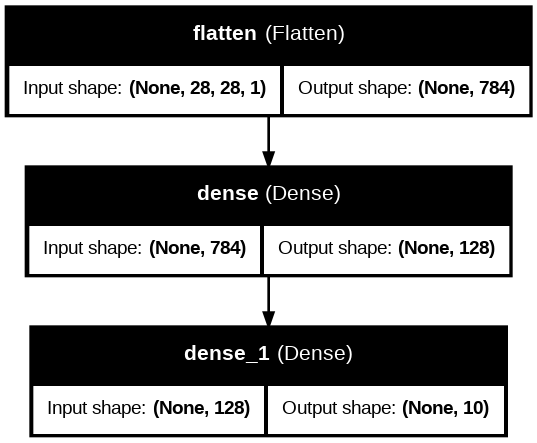

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')

In [50]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4766 - loss: 1.9350 - val_accuracy: 0.7981 - val_loss: 0.8891
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8134 - loss: 0.7765 - val_accuracy: 0.8579 - val_loss: 0.5635
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8655 - loss: 0.5209 - val_accuracy: 0.8764 - val_loss: 0.4567
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8873 - loss: 0.4236 - val_accuracy: 0.8883 - val_loss: 0.4013
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8951 - loss: 0.3810 - val_accuracy: 0.8976 - val_loss: 0.3682
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9016 - loss: 0.3507 - val_accuracy: 0.9021 - val_loss: 0.3492
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9102 - loss: 0.3259 - val_accuracy: 0.9039 - val_loss: 0.3371
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9081 - loss: 0.3181 - 

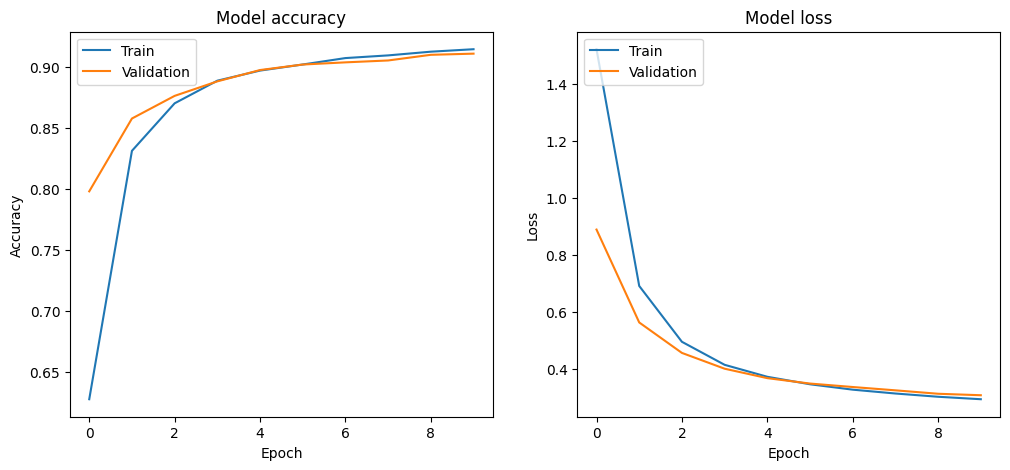

In [52]:
def history_plot(history, model_name='Model'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left');

history_plot(history)

In [53]:
from tensorflow.keras.layers import Dropout

# Define a deeper model
model_deep = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_deep.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, Y_train,
                               validation_data=(X_test, Y_test),
                               epochs=10,
                               batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5562 - loss: 1.3115 - val_accuracy: 0.8430 - val_loss: 0.4946
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8638 - loss: 0.4474 - val_accuracy: 0.8836 - val_loss: 0.3899
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8957 - loss: 0.3579 - val_accuracy: 0.9095 - val_loss: 0.3027
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9170 - loss: 0.2726 - val_accuracy: 0.9240 - val_loss: 0.2493
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9300 - loss: 0.2300 - val_accuracy: 0.9299 - val_loss: 0.2259
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9423 - loss: 0.1898 - val_accuracy: 0.9393 - val_loss: 0.1963
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9479 - loss: 0.1682 - val_accuracy: 0.9356 - val_loss: 0.2038
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9547 - loss: 0.1464 -

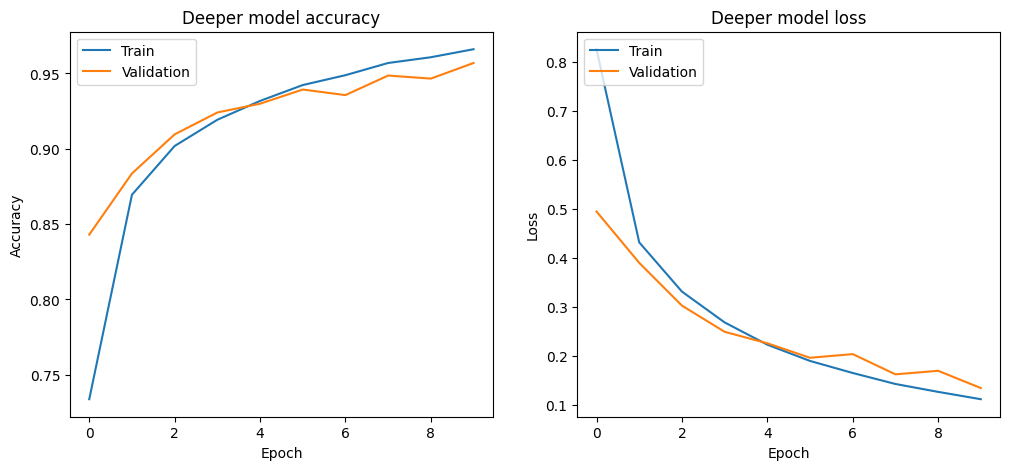

In [54]:
history_plot(history_deep, model_name='Deeper model')

In [55]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define a model with convolutional layers
model_conv = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dense(10, activation='softmax')                                              # Output layer
])


model_conv.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
history_conv = model_conv.fit(X_train, Y_train,
                              validation_data=(X_test, Y_test),
                              epochs=10,
                              batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.3185 - loss: 1.8464 - val_accuracy: 0.8873 - val_loss: 0.3733
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9018 - loss: 0.3288 - val_accuracy: 0.9263 - val_loss: 0.2420
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.9332 - loss: 0.2194 - val_accuracy: 0.9462 - val_loss: 0.1794
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9509 - loss: 0.1592 - val_accuracy: 0.9557 - val_loss: 0.1467
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9610 - loss: 0.1271 - val_accuracy: 0.9611 - val_loss: 0.1261
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9654 - loss: 0.1101 - val_accuracy: 0.9633 - val_loss: 0.1111
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9693 - loss: 0.1007 - val_accuracy: 0.9683 - val_loss: 0.0978
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9714 -

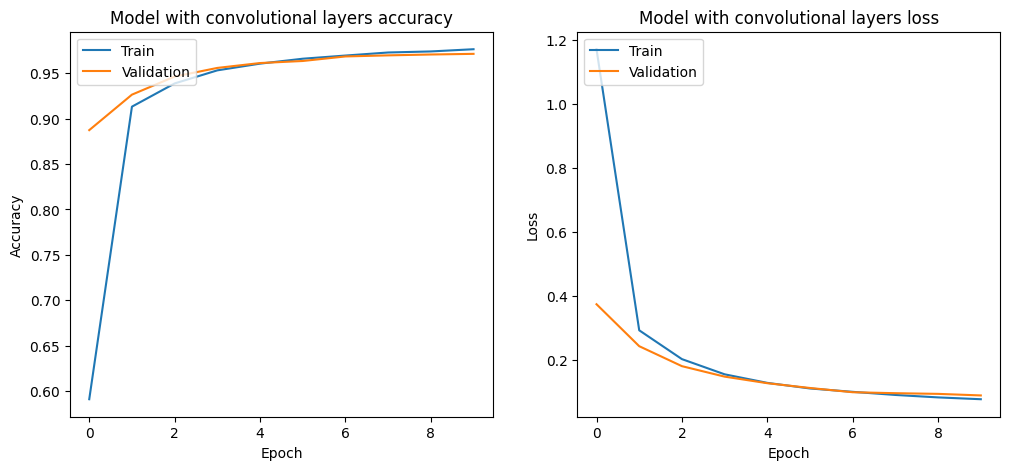

In [57]:
history_plot(history_conv, model_name='Model with convolutional layers')

In [58]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.2 MB/s eta 0:00:00


In [59]:
import keras_tuner as kt

In [60]:
# Define a model with dropout
model_dropout = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dropout(0.5),                                                               # Dropout layer
    Dense(10, activation='softmax')                                              # Output layer
])

model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, Y_train,
                                    validation_data=(X_train, Y_train),
                                    epochs=10,
                                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 70s 61ms/step - accuracy: 0.3391 - loss: 1.8157 - val_accuracy: 0.9006 - val_loss: 0.3569
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.8285 - loss: 0.5446 - val_accuracy: 0.9380 - val_loss: 0.2160
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 40ms/step - accuracy: 0.8809 - loss: 0.3783 - val_accuracy: 0.9533 - val_loss: 0.1579
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.9012 - loss: 0.3194 - val_accuracy: 0.9573 - val_loss: 0.1386
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9154 - loss: 0.2768 - val_accuracy: 0.9630 - val_loss: 0.1159
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.9182 - loss: 0.2597 - val_accuracy: 0.9662 - val_loss: 0.1089
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.9215 - loss: 0.2514 - val_accuracy: 0.9673 - val_loss: 0.1044
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9330 -

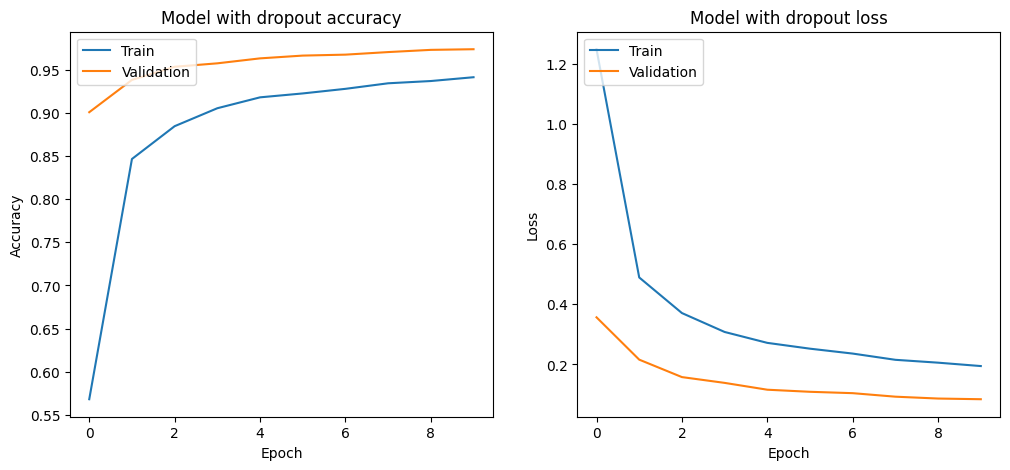

In [65]:
history_plot(history_dropout, model_name='Model with dropout')